In [97]:
import matplotlib as mlt
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import datetime
sns.set()


In [98]:
my_history = pd.read_csv('me.csv')
wife_history = pd.read_csv('wife.csv')

In [99]:
my_history['Date'] = pd.to_datetime(my_history['Date'])
my_history['Year'], my_history['Month'] = my_history['Date'].dt.year, my_history['Date'].dt.month_name()
my_history['Day'] = my_history['Date'].dt.day
my_history['Day_of_week'] = my_history['Date'].dt.day_name()


In [100]:
wife_history['Date'] = pd.to_datetime(wife_history['Date'])
wife_history['Year'], wife_history['Month'] = wife_history['Date'].dt.year, wife_history['Date'].dt.month_name()
wife_history['Day'] = wife_history['Date'].dt.day
wife_history['Day_of_week'] = wife_history['Date'].dt.day_name()

In [101]:
show_details = my_history.Title.str.split(":",expand=True,n=2)
#show_details
my_history['show_name'] = show_details[0]
my_history['season'] = show_details[1]
my_history['episode_name'] = show_details[2]

In [102]:
show_details = wife_history.Title.str.split(":",expand=True,n=2)
#show_details
wife_history['show_name'] = show_details[0]
wife_history['season'] = show_details[1]
wife_history['episode_name'] = show_details[2]

In [103]:
#If the season column is "None" them it is most likely a movie, lets add another column to our dataframe 
#my_history[my_history['season'].isna()]
my_history['show_type'] = my_history.apply(lambda x:'Movie' if pd.isnull(x['season']) else 'TV Show' , axis=1)
my_history

,Title,Date,Year,Month,Day,Day_of_week,show_name,season,episode_name,show_type
0,Disenchantment: Part 2: The Very Thing,2019-11-17,2019,November,17,Sunday,Disenchantment,Part 2,The Very Thing,TV Show
1,Disenchantment: Part 2: Stairway to Hell,2019-11-17,2019,November,17,Sunday,Disenchantment,Part 2,Stairway to Hell,TV Show
2,"Unnatural Selection: Limited Series: Cut, Past...",2019-11-17,2019,November,17,Sunday,Unnatural Selection,Limited Series,"Cut, Paste, Life",TV Show
3,Inside Bill's Brain: Decoding Bill Gates: Limi...,2019-11-16,2019,November,16,Saturday,Inside Bill's Brain,Decoding Bill Gates,Limited Series: Part 3,TV Show
4,Inside Bill's Brain: Decoding Bill Gates: Limi...,2019-11-16,2019,November,16,Saturday,Inside Bill's Brain,Decoding Bill Gates,Limited Series: Part 2,TV Show
5,Inside Bill's Brain: Decoding Bill Gates: Limi...,2019-11-16,2019,November,16,Saturday,Inside Bill's Brain,Decoding Bill Gates,Limited Series: Part 1,TV Show
6,Explained: Season 2: Coding,2019-11-16,2019,November,16,Saturday,Explained,Season 2,Coding,TV Show
7,Explained: Season 2: Pirates,2019-11-16,2019,November,16,Saturday,Explained,Season 2,Pirates,TV Show
8,Patriot Act with Hasan Minhaj: Volume 4: The R...,2019-11-15,2019,November,15,Friday,Patriot Act with Hasan Minhaj,Volume 4,The Real Cost of Cruises,TV Show
9,Patriot Act with Hasan Minhaj: Volume 4: Fentanyl,2019-11-15,2019,November,15,Friday,Patriot Act with Hasan Minhaj,Volume 4,Fentanyl,TV Show


limit_output extension: Maximum message size of 10000 exceeded with 19125 characters

In [104]:
wife_history['show_type'] = wife_history.apply(lambda x:'Movie' if pd.isnull(x['season']) else 'TV Show' , axis=1)
wife_history

,Title,Date,Year,Month,Day,Day_of_week,show_name,season,episode_name,show_type
0,Erin Brockovich,2019-11-16,2019,November,16,Saturday,Erin Brockovich,None,None,Movie
1,Queer Eye: We're in Japan!: Season 1: Crazy in...,2019-11-15,2019,November,15,Friday,Queer Eye,We're in Japan!,Season 1: Crazy in Love,TV Show
2,Queer Eye: We're in Japan!: Season 1: Japanese...,2019-11-15,2019,November,15,Friday,Queer Eye,We're in Japan!,Season 1: Japanese Holiday,TV Show
3,Rotten: Season 2: The Avocado War,2019-11-12,2019,November,12,Tuesday,Rotten,Season 2,The Avocado War,TV Show
4,Midnight Diner: Tokyo Stories: Season 1: Tan Men,2019-11-12,2019,November,12,Tuesday,Midnight Diner,Tokyo Stories,Season 1: Tan Men,TV Show
5,Seth Meyers: Lobby Baby,2019-11-10,2019,November,10,Sunday,Seth Meyers,Lobby Baby,None,TV Show
6,Wild Wild Country: Season 1: Part 6,2019-11-08,2019,November,8,Friday,Wild Wild Country,Season 1,Part 6,TV Show
7,The Office (U.S.): Season 1: Pilot,2019-11-08,2019,November,8,Friday,The Office (U.S.),Season 1,Pilot,TV Show
8,Wild Wild Country: Season 1: Part 3,2019-11-07,2019,November,7,Thursday,Wild Wild Country,Season 1,Part 3,TV Show
9,Our Planet - Behind The Scenes,2019-11-06,2019,November,6,Wednesday,Our Planet - Behind The Scenes,None,None,Movie


limit_output extension: Maximum message size of 10000 exceeded with 19347 characters

,Year,Day
Year,1.000000,-0.152502
Day,-0.152502,1.000000


In [105]:
print('\nSample\n',my_history.sample(5))



Sample
                                                  Title       Date  Year  \
462            Brooklyn Nine-Nine: Season 5: HalloVeen 2019-01-06  2019   
260   COMEDIANS of the world: Canada (EN): Ivan Decker 2019-04-27  2019   
772                       Trapped: Season 1: Episode 3 2018-08-25  2018   
395  BoJack Horseman: Season 5: Mr. Peanutbutter's ... 2019-01-31  2019   
578  Patriot Act with Hasan Minhaj: Volume 1: Conte... 2018-12-16  2018   

        Month  Day Day_of_week                      show_name        season  \
462   January    6      Sunday             Brooklyn Nine-Nine      Season 5   
260     April   27    Saturday         COMEDIANS of the world   Canada (EN)   
772    August   25    Saturday                        Trapped      Season 1   
395   January   31    Thursday                BoJack Horseman      Season 5   
578  December   16      Sunday  Patriot Act with Hasan Minhaj      Volume 1   

                            episode_name show_type  
462         

In [106]:
print('\nSample\n',wife_history.sample(5))


Sample
                                                  Title       Date  Year  \
122  Friends: Season 3: The One Where Ross & Rachel... 2019-08-17  2019   
343         BoJack Horseman: Season 2: Brand New Couch 2019-05-15  2019   
337         BoJack Horseman: Season 2: Hank After Dark 2019-05-18  2019   
603                  Dark Tourist: Season 1: The Stans 2018-09-21  2018   
217                        Fargo: Season 2: Rhinoceros 2019-06-29  2019   

         Month  Day Day_of_week        show_name     season  \
122     August   17    Saturday          Friends   Season 3   
343        May   15   Wednesday  BoJack Horseman   Season 2   
337        May   18    Saturday  BoJack Horseman   Season 2   
603  September   21      Friday     Dark Tourist   Season 1   
217       June   29    Saturday            Fargo   Season 2   

                                  episode_name show_type  
122   The One Where Ross & Rachel Take a Break   TV Show  
343                            Brand New Co

In [107]:
#Saving the dataframe as csv
my_history.to_csv('g-history.csv', index=False)
wife_history.to_csv('p-history.csv', index=False)

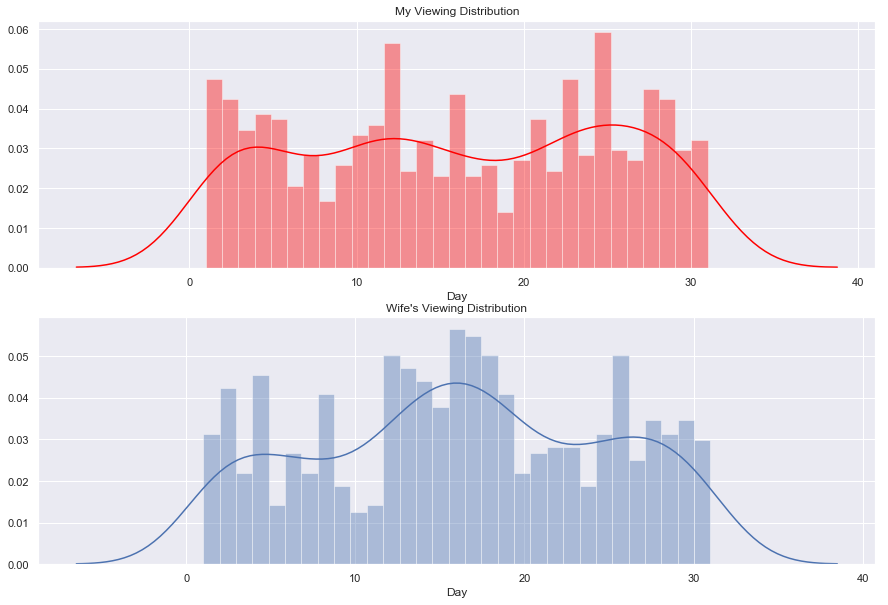

In [108]:
#Day of the month - Monthly viewing distribution
plt.figure(figsize=(15,10))
plt.subplot(2,1,1)
plt.title("My Viewing Distribution")
ax = sns.distplot(my_history['Day'],bins=31,color="red",hist=True)
plt.subplot(2,1,2)
plt.title("Wife's Viewing Distribution")
ax = sns.distplot(wife_history['Day'],bins=31,hist=True)
plt.savefig('01-viewing-distribution.png')


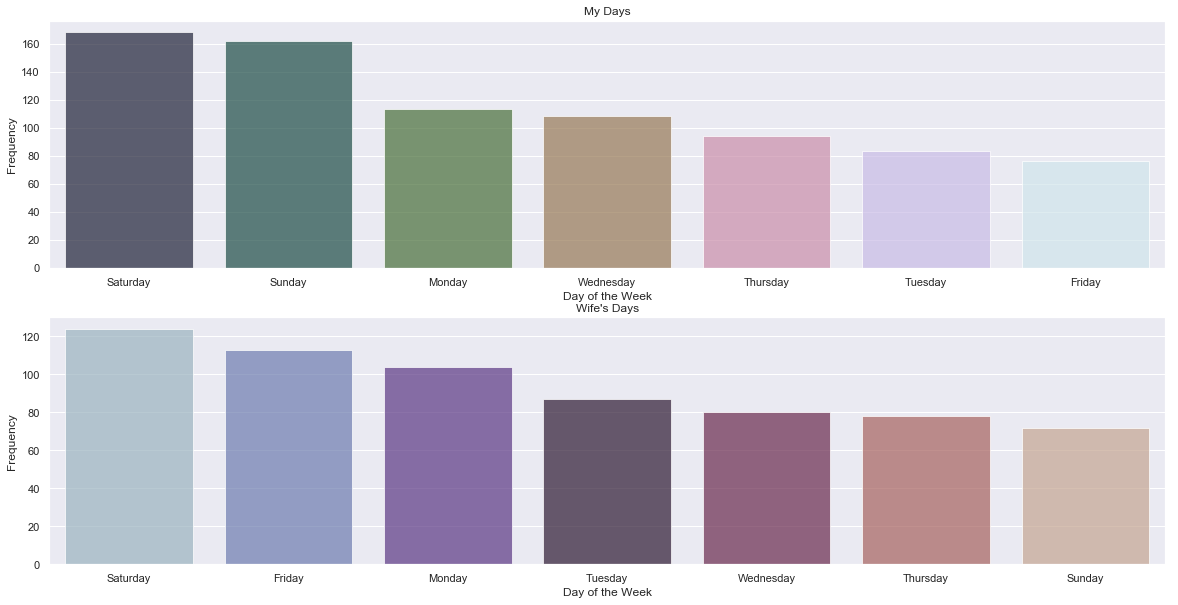

In [109]:
#cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
#sns.cubehelix_palette(8)
#sns.color_palette("Blues")
plt.figure(figsize=(20,10))
plt.subplot(2,1,1)
ax = sns.barplot(x=my_history["Day_of_week"].value_counts().index, y=my_history["Day_of_week"].value_counts(), palette="cubehelix",alpha=0.7)
plt.title("My Days")
plt.xlabel("Day of the Week")
plt.ylabel("Frequency")

plt.subplot(2,1,2)
ax = sns.barplot(x=wife_history["Day_of_week"].value_counts().index, y=wife_history["Day_of_week"].value_counts(),palette="twilight",alpha=0.7)
plt.title("Wife's Days")
plt.xlabel("Day of the Week")
plt.ylabel("Frequency")
plt.savefig('02-Daywise.png')


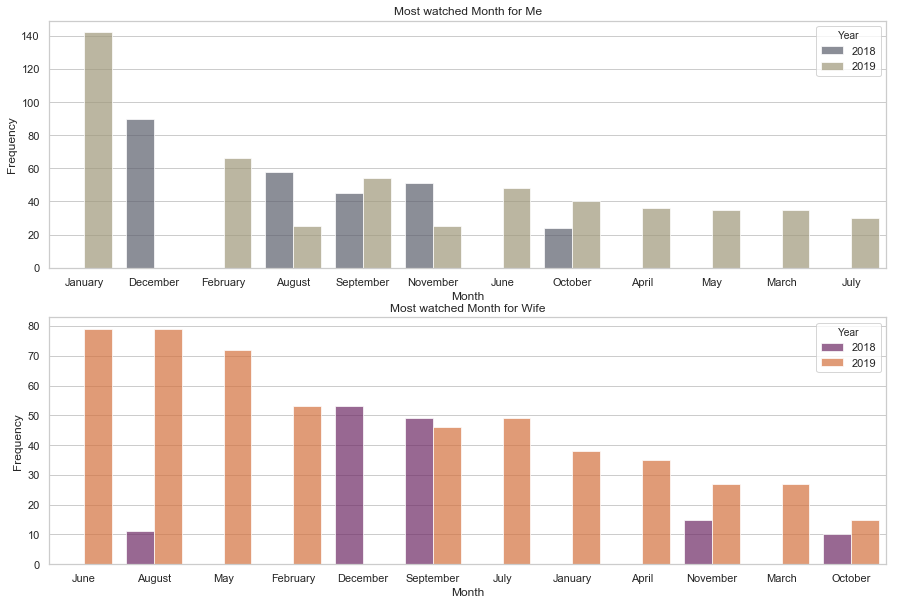

In [110]:
sns.set_style('whitegrid')
by_year = my_history.groupby('Month')['Year'].value_counts().sort_values(ascending=False).reset_index(name='Frequency')
#print(by_year)
plt.figure(figsize=(15,10))
plt.subplot(2,1,1)
ax = sns.barplot(x=by_year["Month"], y=by_year["Frequency"], hue=by_year["Year"], palette="cividis",alpha=0.7)
plt.title("Most watched Month for Me")


by_year = wife_history.groupby('Month')['Year'].value_counts().sort_values(ascending=False).reset_index(name='Frequency')
plt.subplot(2,1,2)
ax = sns.barplot(x=by_year["Month"], y=by_year["Frequency"], hue=by_year["Year"], palette="inferno",alpha=0.7)
plt.title("Most watched Month for Wife")
plt.savefig('03-Monthwise.png')






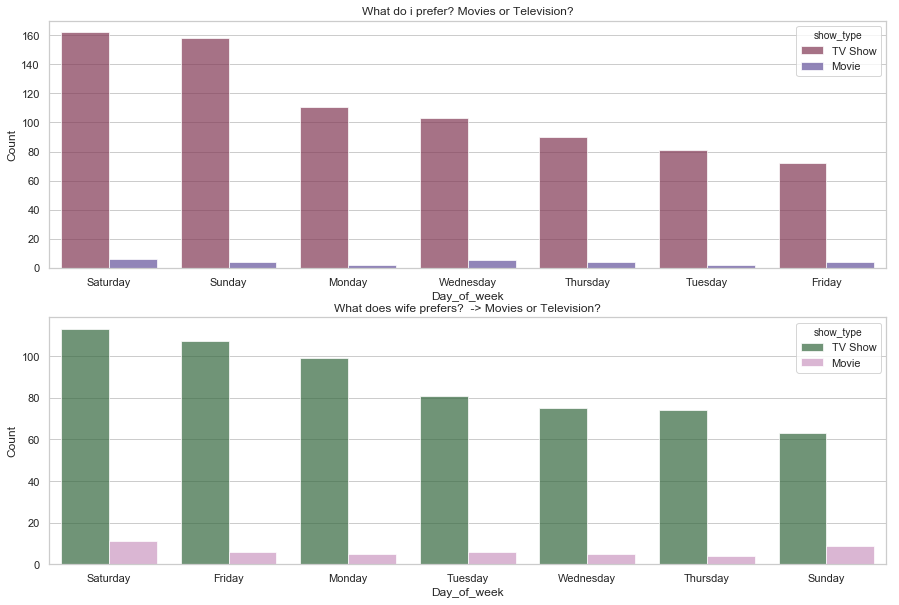

In [111]:
#when do i watch Movies and TV Shows
sns.set_style('whitegrid')


show_freq = my_history.groupby('show_type')['Day_of_week'].value_counts().sort_values(ascending=False).reset_index(name='Count')
#show_freq
plt.figure(figsize=(15,10))
plt.subplot(2,1,1)
ax = sns.barplot(x=show_freq["Day_of_week"], y=show_freq["Count"], hue=show_freq["show_type"], palette="twilight_r",alpha=0.7)
plt.title("What do i prefer? Movies or Television?")

show_freq = wife_history.groupby('show_type')['Day_of_week'].value_counts().sort_values(ascending=False).reset_index(name='Count')
plt.subplot(2,1,2)
ax = sns.barplot(x=show_freq["Day_of_week"], y=show_freq["Count"], hue=show_freq["show_type"], palette="cubehelix",alpha=0.7)

plt.title("What does wife prefers?  -> Movies or Television?")

plt.savefig('04-MovieVStvshow.png')



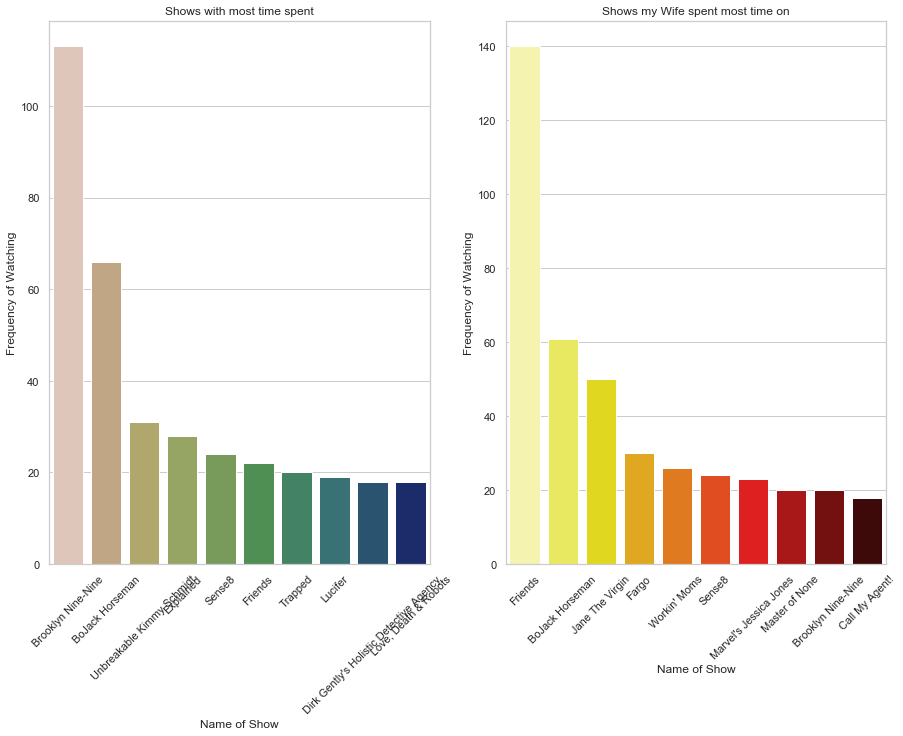

In [112]:
plt.figure(figsize=(15,10))
plt.subplot(1,2,1)
ax = sns.barplot(x=my_history['show_name'].sort_values(ascending=True).value_counts().index[:10], 
                 y=my_history["show_name"].sort_values(ascending=True).value_counts()[:10],
                 palette="gist_earth_r")
plt.title("Shows with most time spent")
plt.xlabel("Name of Show")
plt.ylabel("Frequency of Watching")
loc, labels = plt.xticks()
ax.set_xticklabels(labels, rotation=45)
plt.subplot(1,2,2)
ax = sns.barplot(x=wife_history['show_name'].sort_values(ascending=True).value_counts().index[:10], 
                 y=wife_history["show_name"].sort_values(ascending=True).value_counts()[:10],
                 palette="hot_r")
plt.title("Shows my Wife spent most time on")
plt.xlabel("Name of Show")
plt.ylabel("Frequency of Watching")
loc, labels = plt.xticks()
ax.set_xticklabels(labels, rotation=45)
plt.savefig('05-mostwatched.png')


#heatmap.set_xticklabels(labels, rotation=45)

#my_tab = pd.crosstab(index=my_history['show_name'],columns='count')
#(my_tab/my_tab.sum())
#sns.barplot(values_count[:10].index.values, values_count[:10],palette="rocket")

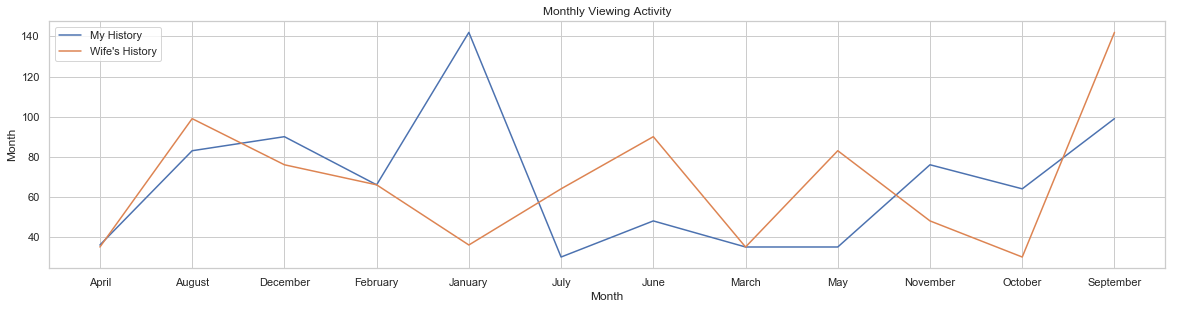

In [113]:
#plt.figure(figsize=(15,10))
#sns.set(style="darkgrid")
#sns.lineplot(x=my_history["Month"].value_counts().index, y=my_history["Month"].value_counts())
plt.figure(figsize=(20,10))
plt.subplot(2,1,1)

ax = sns.lineplot(x=my_history["Month"].value_counts().index, y=my_history["Month"].value_counts(), palette="BuGn_r", label="My History")
plt.title("Monthly Viewing Activity")
plt.xlabel("Month")
plt.ylabel("Frequency")
#plt.subplot(2,1,1) # This triggers matplotlib warning
ax = sns.lineplot(x=wife_history["Month"].value_counts().index, y=my_history["Month"].value_counts(), palette="Blues_r", label="Wife's History")
ax.legend()
plt.savefig('06-Monthly-Viewing.png')






Text(0, 0.5, 'Frequency')

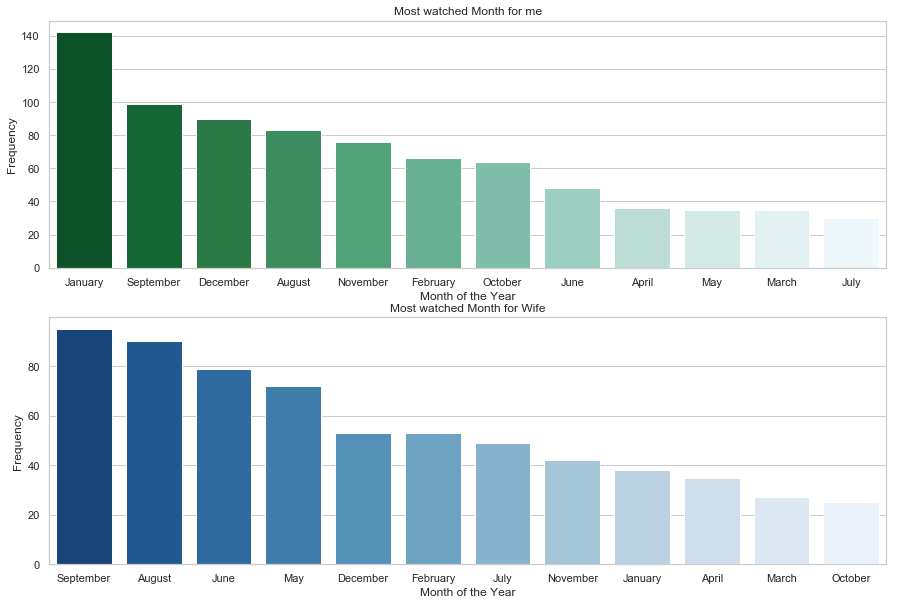

In [114]:
plt.figure(figsize=(15,10))
plt.subplot(2,1,1)
ax = sns.barplot(x=my_history["Month"].value_counts().index, y=my_history["Month"].value_counts(), palette="BuGn_r")
plt.title("Most watched Month for me")
plt.xlabel("Month of the Year")
plt.ylabel("Frequency")

plt.subplot(2,1,2)
ax = sns.barplot(x=wife_history["Month"].value_counts().index, y=wife_history["Month"].value_counts(), palette="Blues_r")
plt.title("Most watched Month for Wife")
plt.xlabel("Month of the Year")
plt.ylabel("Frequency")